In [1]:
import pyterrier as pt
if not pt.started():
    pt.init(version='5.7', helper_version='0.0.7')
import ir_datasets as irds

/tmp/ipykernel_74971/3295562699.py:2: DeprecationWarning: Call to deprecated function (or staticmethod) started. (use pt.java.started() instead) -- Deprecated since version 0.11.0.
  if not pt.started():
No etc/terrier.properties, using terrier.default.properties for bootstrap configuration.
Java started and loaded: pyterrier.java, pyterrier.terrier.java [version=5.7 (build: craigm 2022-11-10 18:30), helper_version=0.0.7]
/tmp/ipykernel_74971/3295562699.py:3: DeprecationWarning: Call to deprecated method pt.init(). Deprecated since version 0.11.0.
The following code will have the same effect:
pt.terrier.set_version('5.7')
pt.terrier.set_helper_version('0.0.7')
pt.java.init() # optional, forces java initialisation
  pt.init(version='5.7', helper_version='0.0.7')


In [2]:
pt.list_datasets()

,dataset,topics,topics_lang,qrels,corpus,corpus_lang,index,info_url
0,50pct,"[training, validation]",en,"[training, validation]",None,None,"[ex2, ex3]",None
1,antique,"[train, test]",en,"[train, test]",True,en,None,https://ciir.cs.umass.edu/downloads/Antique/re...
2,vaswani,True,en,True,True,en,True,http://ir.dcs.gla.ac.uk/resources/test_collect...
3,msmarco_document,"[train, dev, test, test-2020, leaderboard-2020]",en,"[train, dev, test, test-2020]",True,en,True,https://microsoft.github.io/msmarco/
4,msmarcov2_document,"[train, dev1, dev2, valid1, valid2, trec_2021]",en,"[train, dev1, dev2, valid1, valid2]",None,None,True,https://microsoft.github.io/msmarco/TREC-Deep-...
...,...,...,...,...,...,...,...,...
763,irds:neuclir,None,None,None,None,None,None,https://ir-datasets.com/neuclir.html
764,irds:neuclir/1,None,None,None,None,None,None,https://ir-datasets.com/neuclir.html#neuclir/1
779,irds:sara,True,en,True,True,en,None,https://ir-datasets.com/sara.html
780,trec-deep-learning-docs,"[train, dev, test, test-2020, leaderboard-2020]",en,"[train, dev, test, test-2020]",True,en,True,https://microsoft.github.io/msmarco/


In [3]:
ds_list = pt.list_datasets()['dataset'].to_list()

# find dataset name containing "scifact"
ds_name = [ds for ds in ds_list if 'scifact' in ds]
print(ds_name)

['irds:beir/scifact', 'irds:beir/scifact/test', 'irds:beir/scifact/train', 'irds:nano-beir/scifact']


In [4]:
scifact = pt.get_dataset("irds:beir/scifact")

In [5]:
scifact.get_topics()

,qid,query
0,0,0 dimensional biomaterials lack inductive prop...
1,2,1 in 5 million in uk have abnormal prp positivity
2,4,1 1 of colorectal cancer patients are diagnose...
3,6,10 of sudden infant death syndrome sids deaths...
4,9,32 of liver transplantation programs required ...
...,...,...
1104,1379,women with a higher birth weight are more like...
1105,1382,apkcz causes tumour enhancement by affecting g...
1106,1385,csmac formation enhances weak ligand signalling
1107,1389,mtorc2 regulates intracellular cysteine levels...


In [6]:
corpus_iter = scifact.get_corpus_iter()

beir/scifact documents:   0%|          | 0/5183 [00:00<?, ?it/s]

In [7]:
all_docs = []
for doc in corpus_iter:
    all_docs.append(doc)

beir/scifact documents: 100%|██████████| 5183/5183 [00:02<00:00, 2532.17it/s]


In [8]:
len(all_docs)

5183

In [9]:
all_docs[0]

{'text': 'Alterations of the architecture of cerebral white matter in the developing human brain can affect cortical development and result in functional disabilities. A line scan diffusion-weighted magnetic resonance imaging (MRI) sequence with diffusion tensor analysis was applied to measure the apparent diffusion coefficient, to calculate relative anisotropy, and to delineate three-dimensional fiber architecture in cerebral white matter in preterm (n = 17) and full-term infants (n = 7). To assess effects of prematurity on cerebral white matter development, early gestation preterm infants (n = 10) were studied a second time at term. In the central white matter the mean apparent diffusion coefficient at 28 wk was high, 1.8 microm2/ms, and decreased toward term to 1.2 microm2/ms. In the posterior limb of the internal capsule, the mean apparent diffusion coefficients at both times were similar (1.2 versus 1.1 microm2/ms). Relative anisotropy was higher the closer birth was to term with 

In [11]:
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
docs_text = [doc['text'] for doc in all_docs]

embedding_model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda:2')
topic_model = BERTopic(embedding_model=embedding_model)
topics, probs = topic_model.fit_transform(docs_text)

In [12]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1449,-1_the_of_and_in,"[the, of, and, in, to, with, is, that, for, ce...","[Somatic cell nuclear transfer, cell fusion, o..."
1,0,85,0_data_http_sequence_software,"[data, http, sequence, software, available, se...",[MOTIVATION Testing for correlations between d...
2,1,76,1_mir_mirnas_mirna_hcc,"[mir, mirnas, mirna, hcc, expression, microrna...","[MicroRNAs (miRNAs) are a family of short, non..."
3,2,75,2_malaria_transmission_falciparum_elimination,"[malaria, transmission, falciparum, eliminatio...",[BACKGROUND Falciparum malaria or malaria trop...
4,3,69,3_actin_cadherin_cell_adhesion,"[actin, cadherin, cell, adhesion, rho, epithel...",[The morphology of neuronal dendritic spines i...
...,...,...,...,...,...
132,131,11,131_il_eae_nlrp12_p0,"[il, eae, nlrp12, p0, ean, 17, gamma, autoimmu...",[Two synthetic peripheral nerve myelin P0 prot...
133,132,11,132_psgl_leukocyte_microvillus_rolling,"[psgl, leukocyte, microvillus, rolling, icam, ...",[No direct evidence has been reported whether ...
134,133,10,133_anthracycline_tamoxifen_breast_dim,"[anthracycline, tamoxifen, breast, dim, adjuva...",[BACKGROUND Central nervous system (CNS) disea...
135,134,10,134_us28_heavy_orf74_us11,"[us28, heavy, orf74, us11, cd46, mhc, dislocat...",[The human cytomegalovirus gene product US11 c...


In [13]:
topic_distr, _ = topic_model.approximate_distribution(docs_text)

In [14]:
print(len(topic_distr))
print(len(topic_distr[0]))

5183
136


In [15]:
topic_distr[0]

array([0.00426483, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00865886,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16887422, 0.00596572, 0.        ,
       0.        , 0.        , 0.01235563, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
topic_model.get_topic_info(0)

,Topic,Count,Name,Representation,Representative_Docs
0,0,85,0_data_http_sequence_software,"[data, http, sequence, software, available, se...",[MOTIVATION Testing for correlations between d...


In [18]:
topic_model.get_topic_info(0)['Representation'][0]

['data',
 'http',
 'sequence',
 'software',
 'available',
 'sequences',
 'database',
 'reads',
 'genome',
 'tools']

In [ ]:
topic_model.get_document_info(docs_text)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,Alterations of the architecture of cerebral wh...,83,83_matter_white_diffusion_dti,"[matter, white, diffusion, dti, wm, tensor, co...",[OBJECTIVE The purpose of our study was to inv...,matter - white - diffusion - dti - wm - tensor...,1.000000,True
1,Myelodysplastic syndromes (MDS) are age-depend...,-1,-1_the_of_and_in,"[the, of, and, in, to, with, is, that, for, ce...","[Somatic cell nuclear transfer, cell fusion, o...",the - of - and - in - to - with - is - that - ...,0.000000,False
2,ID elements are short interspersed elements (S...,-1,-1_the_of_and_in,"[the, of, and, in, to, with, is, that, for, ce...","[Somatic cell nuclear transfer, cell fusion, o...",the - of - and - in - to - with - is - that - ...,0.000000,False
3,DNA methylation plays an important role in bio...,43,43_methylation_cpg_dna_methylated,"[methylation, cpg, dna, methylated, epigenetic...",[Aberrant methylation of promoter CpG islands ...,methylation - cpg - dna - methylated - epigene...,1.000000,False
4,Two human Golli (for gene expressed in the oli...,-1,-1_the_of_and_in,"[the, of, and, in, to, with, is, that, for, ce...","[Somatic cell nuclear transfer, cell fusion, o...",the - of - and - in - to - with - is - that - ...,0.000000,False
...,...,...,...,...,...,...,...,...
5178,BACKGROUND The main associations of body-mass ...,-1,-1_the_of_and_in,"[the, of, and, in, to, with, is, that, for, ce...","[Somatic cell nuclear transfer, cell fusion, o...",the - of - and - in - to - with - is - that - ...,0.000000,False
5179,A key aberrant biological difference between t...,20,20_hypoxia_glutamine_metabolic_cancer,"[hypoxia, glutamine, metabolic, cancer, metabo...",[Metabolic pathway reprogramming is a hallmark...,hypoxia - glutamine - metabolic - cancer - met...,0.981291,False
5180,A signaling pathway transmits information from...,-1,-1_the_of_and_in,"[the, of, and, in, to, with, is, that, for, ce...","[Somatic cell nuclear transfer, cell fusion, o...",the - of - and - in - to - with - is - that - ...,0.000000,False
5181,AIMS Trabecular bone score (TBS) is a surrogat...,15,15_vitamin_25_bone_oh,"[vitamin, 25, bone, oh, bmd, calcium, fracture...",[CONTEXT Adequate vitamin D status for optimum...,vitamin - 25 - bone - oh - bmd - calcium - fra...,1.000000,False


In [ ]:
from keybert import KeyBERT

# Use a transformer model with GPU
embedding_model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda:2')
kw_model = KeyBERT(model=embedding_model)
# Extract keywords


In [48]:
test_doc = all_docs[0]
keywords = kw_model.extract_keywords(test_doc['text'], keyphrase_ngram_range=(1,4), use_mmr=True, stop_words='english', diversity=0.5)
print(keywords)

[('cerebral white matter developing', 0.6773), ('measure apparent diffusion coefficient', 0.4691), ('tensor mri', 0.3834), ('compared term infants', 0.3341), ('matter fiber organization', 0.2733)]


In [50]:
from bertopic import BERTopic
from keybert import KeyBERT
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Sample documents
docs = [doc['text'] for doc in all_docs][:50]

# Step 1: Use BERTopic to identify topics
topic_model = BERTopic(calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

# Step 2: Group documents by topic
topic_docs = {}
for doc, topic in zip(docs, topics):
    if topic not in topic_docs:
        topic_docs[topic] = []
    topic_docs[topic].append(doc)

# Step 3: Initialize KeyBERT
kw_model = KeyBERT()

# Step 4: Extract topic-level keywords to understand the topic's general content
topic_keywords = {}
for topic, topic_doc_list in topic_docs.items():
    if topic == -1:  # Skip outliers
        continue
    # Combine all documents in the topic to get topic-level keywords
    combined_text = " ".join(topic_doc_list)
    topic_keywords[topic] = kw_model.extract_keywords(
        combined_text,
        keyphrase_ngram_range=(1, 2),
        stop_words='english',
        top_n=10
    )

# Step 5: Extract document-level keywords and filter based on topic context
document_keywords = []
for doc_idx, (doc, topic) in enumerate(zip(docs, topics)):
    if topic == -1:  # Skip outliers
        document_keywords.append((doc, []))
        continue
    
    # Extract document-level keywords
    doc_keywords = kw_model.extract_keywords(
        doc,
        keyphrase_ngram_range=(1, 2),
        stop_words='english',
        top_n=5,
        use_mmr=True,
        diversity=0.5
    )
    
    # Get topic-level keywords for comparison
    topic_kw = topic_keywords.get(topic, [])
    topic_kw_set = set(kw[0] for kw in topic_kw)
    
    # Filter document keywords: keep only those that are not too common in the topic
    filtered_keywords = []
    for keyword, score in doc_keywords:
        # Check if the keyword is in the top topic keywords (i.e., too common in the topic)
        if keyword not in topic_kw_set:
            filtered_keywords.append((keyword, score))
        else:
            # Optionally, reduce the score of common keywords instead of filtering them out
            adjusted_score = score * 0.5  # Reduce score for common keywords
            filtered_keywords.append((keyword, adjusted_score))
    
    # Sort by adjusted score and take top 5
    filtered_keywords = sorted(filtered_keywords, key=lambda x: x[1], reverse=True)[:5]
    document_keywords.append((doc, filtered_keywords))

# Step 6: Output the results
for doc, keywords in document_keywords:
    print(f"Document: {doc}")
    print(f"Keywords: {keywords}\n")

2025-04-17 16:56:38,680 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 2/2 [00:00<00:00, 39.85it/s]
2025-04-17 16:56:41,056 - BERTopic - Embedding - Completed ✓
2025-04-17 16:56:41,057 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-17 16:56:41,205 - BERTopic - Dimensionality - Completed ✓
2025-04-17 16:56:41,206 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-17 16:56:41,212 - BERTopic - Cluster - Completed ✓
2025-04-17 16:56:41,216 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-17 16:56:41,242 - BERTopic - Representation - Completed ✓


Document: Alterations of the architecture of cerebral white matter in the developing human brain can affect cortical development and result in functional disabilities. A line scan diffusion-weighted magnetic resonance imaging (MRI) sequence with diffusion tensor analysis was applied to measure the apparent diffusion coefficient, to calculate relative anisotropy, and to delineate three-dimensional fiber architecture in cerebral white matter in preterm (n = 17) and full-term infants (n = 7). To assess effects of prematurity on cerebral white matter development, early gestation preterm infants (n = 10) were studied a second time at term. In the central white matter the mean apparent diffusion coefficient at 28 wk was high, 1.8 microm2/ms, and decreased toward term to 1.2 microm2/ms. In the posterior limb of the internal capsule, the mean apparent diffusion coefficients at both times were similar (1.2 versus 1.1 microm2/ms). Relative anisotropy was higher the closer birth was to term with 

In [2]:
import json
import logging
from typing import Optional, Tuple
import nltk
from bertopic import BERTopic
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer
import pyterrier as pt
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

if not pt.started():
    pt.init(version='5.7', helper_version='0.0.7')


def load_corpus(corpus_jsonl_path=None, corpus_name=None):
    """
    corpus_name: in PyTerrier format, e.g., 'irds:beir/scifact'
    """
    if corpus_jsonl_path is not None:
        # corpus jsonl key: _id, title, text, metadata
        corpus = []
        with open(corpus_jsonl_path, 'r') as f:
            for line in f:
                doc = json.loads(line)
                corpus.append({"docno": doc['_id'], "text": doc['title'] + " " + doc['text']})
        return corpus

    dataset = pt.get_dataset(corpus_name)
    corpus_iter = dataset.get_corpus_iter()
    docs = []
    for doc in corpus_iter:
        docs.append(doc)
    return docs

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)
stop_words = set(stopwords.words('english'))

def preprocess_corpus(corpus: list[dict]) -> tuple[list[str], list[str]]:
    """Split documents into sentences and map sentences to document IDs."""
    sentences = []
    doc_ids = []
    for doc in corpus:
        doc_sentences = get_sentence(doc, stop_words)
        sentences.extend(doc_sentences)
        doc_ids.extend([doc['docno']] * len(doc_sentences))
    return sentences, doc_ids

def get_sentence(doc, stop_words):
    doc_sentences = [sent for sent in sent_tokenize(doc['text']) if sent.strip() not in ['.', ''] and sent.lower() not in stop_words]
    return doc_sentences

def extract_topics(
        corpus: list[dict], 
        model_name: str = "all-MiniLM-L6-v2", 
        min_topic_size: int = 5, 
        device: Optional[str] = "cuda:2",
        reduce_outliers: bool = False,
    ) -> Tuple[BERTopic, dict]:
    """Extract topics from the corpus using BERTopic."""
    try:
        # Preprocess corpus
        logger.info("Preprocessing corpus...")
        sentences, doc_ids = preprocess_corpus(corpus)
        if not sentences:
            logger.error("No sentences found in corpus")
            return {}

        # Initialize and fit BERTopic
        logger.info("Fitting BERTopic model...")
        embedding_model = SentenceTransformer(model_name, device=device)
        topic_model = BERTopic(embedding_model=embedding_model, min_topic_size=min_topic_size, verbose=True)
        topics, prob = topic_model.fit_transform(sentences)

        if reduce_outliers:
            # Reduce outliers
            logger.info("Reducing outliers...")
            new_topics = topic_model.reduce_outliers(sentences, topics, probabilities=prob, strategy="probabilities")
            topic_model.update_topics(sentences, topics=new_topics)

        sentence_to_topic = {sent: topic for sent, topic in zip(sentences, topics)}

        # Map topics to documents
        logger.info("Mapping topics to documents...")
        doc_topics = {}
        for doc in corpus:
            doc_id = doc['docno']
            doc_sentences = get_sentence(doc, stop_words)
            doc_topic_ids = [
                sentence_to_topic[sent] for sent in doc_sentences
                if sent in sentence_to_topic
            ]
            # Filter out outlier topic (-1) and get unique topics
            doc_topic_ids = list(set([t for t in doc_topic_ids if t != -1]))
            # Get topic words and weights
            doc_topics[doc_id] = []
            for topic_id in doc_topic_ids:
                topic_words = [word for word, _ in topic_model.get_topic(topic_id)[:10]]
                # Weight as proportion of sentences in this topic
                weight = doc_topic_ids.count(topic_id) / len(doc_topic_ids) if doc_topic_ids else 0
                doc_topics[doc_id].append({
                    "topic_id": topic_id,
                    "words": topic_words,
                    "weight": weight
                })

        # Group documents by topic
        topic_docs = {}
        for doc_id, topics in doc_topics.items():
            for topic in topics:
                topic_id = topic["topic_id"]
                if topic_id not in topic_docs:
                    topic_docs[topic_id] = []
                topic_docs[topic_id].append(doc_id)

        return topic_model, {"doc_topics": doc_topics, "topic_docs": topic_docs}

    except Exception as e:
        logger.error("Error in topic extraction: %s", e)
        return {}

def save_topics(topic_data: dict, output_file: str):
    """Save topic data to a JSONL file."""
    try:
        with open(output_file, 'w') as f:
            for doc_id, topics in topic_data.get("doc_topics", {}).items():
                f.write(json.dumps({"doc_id": doc_id, "topics": topics}) + '\n')
        logger.info("Topic data saved to %s", output_file)
    except Exception as e:
        logger.error("Error saving topic data: %s", e)

/home/guest/r12922050/miniconda3/envs/bertopic/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     /home/guest/r12922050/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/guest/r12922050/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/guest/r12922050/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_2924495/35729938.py:15: DeprecationWarning: Call to deprecated function (or staticmethod) started. (use pt.java.started() instead) -- Deprecated since version 0.11.0.
  if not pt.started():
No etc/terrier.properties, using terrier.default.properties for bootst

In [ ]:
data = load_corpus(corpus_jsonl_path="/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/corpus.jsonl")
topic_model, topic_data = extract_topics(data, model_name="all-MiniLM-L6-v2", min_topic_size=5, device="cuda:2")

2025-05-14 13:00:02,094 - INFO - Preprocessing corpus...
2025-05-14 13:00:02,808 - INFO - Fitting BERTopic model...
2025-05-14 13:00:02,811 - INFO - Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2025-05-14 13:00:06,228 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 1187/1187 [00:26<00:00, 45.26it/s]
2025-05-14 13:00:32,930 - BERTopic - Embedding - Completed ✓
2025-05-14 13:00:32,932 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-14 13:01:22,896 - BERTopic - Dimensionality - Completed ✓
2025-05-14 13:01:22,900 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingfac

In [4]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10456,-1_fat_were_fish_for,"[fat, were, fish, for, and, was, the, or, this...",[With adjustment for potential confounders (ag...
1,0,369,0_vegetarians_vegetarian_omnivores_vegans,"[vegetarians, vegetarian, omnivores, vegans, v...",[SUBJECTS: A total of 24 vegans and 25 omnivor...
2,1,283,1_cholesterol_lipoprotein_ldl_hdl,"[cholesterol, lipoprotein, ldl, hdl, density, ...",[No significant change was detected in either ...
3,2,282,2_nut_nuts_walnuts_walnut,"[nut, nuts, walnuts, walnut, tree, hazelnut, p...",[Nut consumption was associated with a signifi...
4,3,278,3_no_there_differences_observed,"[no, there, differences, observed, significant...",[No significant differences were found between...
...,...,...,...,...,...
1369,1368,5,1368_qalys_billion_infections_400,"[qalys, billion, infections, 400, annually, sa...",[IMPLICATIONS FOR PUBLIC HEALTH PRACTICE: Salm...
1370,1369,5,1369_npro_nitrite_preserved_micrograms,"[npro, nitrite, preserved, micrograms, rolled,...",[The effect of dietary components on the level...
1371,1370,5,1370_underway_controlled_centre_randomized,"[underway, controlled, centre, randomized, tri...","[A controlled randomized study is underway., A..."
1372,1371,5,1371_isomers_furan_circumference_head,"[isomers, furan, circumference, head, dioxin, ...",[The relationships between the concentration o...


In [5]:
# save topic_model df
df = topic_model.get_topic_info()
df.to_pickle("/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/topics/topic_model_info.pickle")

In [6]:
topic_cnt = []
for docid in topic_data['doc_topics'].keys():
    topic_cnt.append(len(topic_data['doc_topics'][docid]))

print(f"Average number of topics per document: {sum(topic_cnt) / len(topic_cnt)}")
print(f"Max number of topics per document: {max(topic_cnt)}")
print(f"Min number of topics per document: {min(topic_cnt)}")

Average number of topics per document: 3.266446462978255
Max number of topics per document: 14
Min number of topics per document: 0


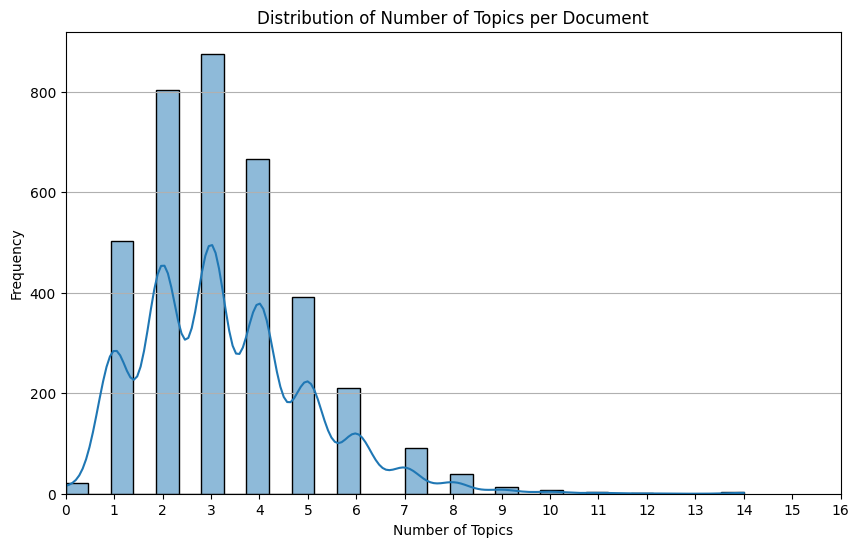

In [7]:
# bar chart topic_cnt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


plt.figure(figsize=(10, 6))
sns.histplot(topic_cnt, bins=30, kde=True)
plt.title('Distribution of Number of Topics per Document')
plt.xlabel('Number of Topics')
plt.ylabel('Frequency')
plt.xlim(0, 16)
plt.xticks(np.arange(0, 17, 1))
plt.grid(axis='y')
plt.show()

In [9]:
save_topics(topic_data, output_file="/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/topics/raw_rep.jsonl")

2025-05-14 13:02:42,187 - INFO - Topic data saved to /home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/topics/raw_rep.jsonl


## Enhance Representation through LLM

### Random Select 4 topics for few-shot representation modeling

In [11]:
import pickle

# read topic_model df
df = pd.read_pickle("/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/topics/topic_model_info.pickle")
df

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10456,-1_fat_were_fish_for,"[fat, were, fish, for, and, was, the, or, this...",[With adjustment for potential confounders (ag...
1,0,369,0_vegetarians_vegetarian_omnivores_vegans,"[vegetarians, vegetarian, omnivores, vegans, v...",[SUBJECTS: A total of 24 vegans and 25 omnivor...
2,1,283,1_cholesterol_lipoprotein_ldl_hdl,"[cholesterol, lipoprotein, ldl, hdl, density, ...",[No significant change was detected in either ...
3,2,282,2_nut_nuts_walnuts_walnut,"[nut, nuts, walnuts, walnut, tree, hazelnut, p...",[Nut consumption was associated with a signifi...
4,3,278,3_no_there_differences_observed,"[no, there, differences, observed, significant...",[No significant differences were found between...
...,...,...,...,...,...
1369,1368,5,1368_qalys_billion_infections_400,"[qalys, billion, infections, 400, annually, sa...",[IMPLICATIONS FOR PUBLIC HEALTH PRACTICE: Salm...
1370,1369,5,1369_npro_nitrite_preserved_micrograms,"[npro, nitrite, preserved, micrograms, rolled,...",[The effect of dietary components on the level...
1371,1370,5,1370_underway_controlled_centre_randomized,"[underway, controlled, centre, randomized, tri...","[A controlled randomized study is underway., A..."
1372,1371,5,1371_isomers_furan_circumference_head,"[isomers, furan, circumference, head, dioxin, ...",[The relationships between the concentration o...


In [20]:
# random select 4 topic rows except -1
topics_for_few_shot = df[df['Topic'] != -1].sample(4, random_state=24)
output_file_name = "/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/topics/topics_for_few_shot.jsonl"

topics_for_few_shot.to_json(output_file_name, orient='records', lines=True)

### Invoke LLM

In [ ]:
%pip install openai
%pip install dotenv

In [23]:
# use deepseek to get the enhanced representation
from openai import OpenAI

# read the API key from .env
import os
from dotenv import load_dotenv
load_dotenv("/home/guest/r12922050/GitHub/d2qplus/.env")

DEEPSEEK_API_KEY = os.getenv("DEEPSEEK_API_KEY")

client = OpenAI(api_key=DEEPSEEK_API_KEY, base_url="https://api.deepseek.com")

response = client.chat.completions.create(
    model="deepseek-chat",
    messages=[
        {"role": "system", "content": "You are a helpful assistant"},
        {"role": "user", "content": "Hello"},
    ],
    stream=False
)

print(response.choices[0].message.content)

2025-05-14 13:31:53,117 - INFO - HTTP Request: POST https://api.deepseek.com/chat/completions "HTTP/1.1 200 OK"


Hello! How can I assist you today? 😊


## Check Enhanced Topics Representation

In [3]:
import pandas as pd
enhanced_topic_pickle_path = "/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/topics/enhanced_topic_model_info.pickle"
df = pd.read_pickle(enhanced_topic_pickle_path)
df

,Topic,Count,Name,Representation,Representative_Docs,Enhanced_Topic
0,-1,10456,-1_fat_were_fish_for,"[fat, were, fish, for, and, was, the, or, this...",[With adjustment for potential confounders (ag...,p
1,0,369,0_vegetarians_vegetarian_omnivores_vegans,"[vegetarians, vegetarian, omnivores, vegans, v...",[SUBJECTS: A total of 24 vegans and 25 omnivor...,mark
2,1,283,1_cholesterol_lipoprotein_ldl_hdl,"[cholesterol, lipoprotein, ldl, hdl, density, ...",[No significant change was detected in either ...,b
3,2,282,2_nut_nuts_walnuts_walnut,"[nut, nuts, walnuts, walnut, tree, hazelnut, p...",[Nut consumption was associated with a signifi...,/s
4,3,278,3_no_there_differences_observed,"[no, there, differences, observed, significant...",[No significant differences were found between...,|reserved_special_token_88|
...,...,...,...,...,...,...
1369,1368,5,1368_qalys_billion_infections_400,"[qalys, billion, infections, 400, annually, sa...",[IMPLICATIONS FOR PUBLIC HEALTH PRACTICE: Salm...,b
1370,1369,5,1369_npro_nitrite_preserved_micrograms,"[npro, nitrite, preserved, micrograms, rolled,...",[The effect of dietary components on the level...,b
1371,1370,5,1370_underway_controlled_centre_randomized,"[underway, controlled, centre, randomized, tri...","[A controlled randomized study is underway., A...","font color=""blue"""
1372,1371,5,1371_isomers_furan_circumference_head,"[isomers, furan, circumference, head, dioxin, ...",[The relationships between the concentration o...,b


In [1]:
import pandas as pd
enhanced_topic_pickle_path = "/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/topics/enhanced_topic_model_info.pickle"
enhanced_df = pd.read_pickle(enhanced_topic_pickle_path)

enhanced_df = enhanced_df[enhanced_df['Topic'] != -1]

In [5]:
# current Enhanced_Topic column has "topic: " prefix, use regex to remove it
import re
def remove_topic_prefix(topic):
    return re.sub(r"topic: ", "", topic)
enhanced_df['Enhanced_Topic'] = enhanced_df['Enhanced_Topic'].apply(remove_topic_prefix)
enhanced_df

,Topic,Count,Name,Representation,Representative_Docs,Enhanced_Topic
1,0,369,0_vegetarians_vegetarian_omnivores_vegans,"[vegetarians, vegetarian, omnivores, vegans, v...",[SUBJECTS: A total of 24 vegans and 25 omnivor...,Comparison of vegan and non-vegetarian diets a...
2,1,283,1_cholesterol_lipoprotein_ldl_hdl,"[cholesterol, lipoprotein, ldl, hdl, density, ...",[No significant change was detected in either ...,Lipoprotein and cholesterol levels analysis
3,2,282,2_nut_nuts_walnuts_walnut,"[nut, nuts, walnuts, walnut, tree, hazelnut, p...",[Nut consumption was associated with a signifi...,Nut consumption and mortality risk reduction
4,3,278,3_no_there_differences_observed,"[no, there, differences, observed, significant...",[No significant differences were found between...,No significant differences between groups
5,4,224,4_sperm_semen_infertile_seminal,"[sperm, semen, infertile, seminal, morphology,...",[Dairy intake and semen quality among men atte...,Dairy intake and semen quality in infertile men
...,...,...,...,...,...,...
1369,1368,5,1368_qalys_billion_infections_400,"[qalys, billion, infections, 400, annually, sa...",[IMPLICATIONS FOR PUBLIC HEALTH PRACTICE: Salm...,Economic and health impact of Salmonella infec...
1370,1369,5,1369_npro_nitrite_preserved_micrograms,"[npro, nitrite, preserved, micrograms, rolled,...",[The effect of dietary components on the level...,Nitrite-preserved meat and urinary NPRO excret...
1371,1370,5,1370_underway_controlled_centre_randomized,"[underway, controlled, centre, randomized, tri...","[A controlled randomized study is underway., A...",Randomized controlled trial design
1372,1371,5,1371_isomers_furan_circumference_head,"[isomers, furan, circumference, head, dioxin, ...",[The relationships between the concentration o...,Dioxin and furan isomer exposure in newborns


In [6]:
enhanced_df.to_pickle("/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/topics/enhanced_topic_model_info.pickle")

## Paragraph-Window Topic Modeling

In [1]:
#!/usr/bin/env python
# paragraph_topic_model.py
import json, re, math, random, collections, itertools, os, pickle

import nltk
nltk.download("punkt", quiet=True)
from nltk import sent_tokenize

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

random.seed(42)

#!/usr/bin/env python
# topic_modeling_driver.py
"""
Run BERTopic on a JSONL corpus with either:
  • sentence-level chunks  (chunk_mode="sentence")
  • sliding paragraph windows (chunk_mode="window")
Outputs a JSONL file mapping each doc_id to its topic
distribution, ready for downstream evaluation.
"""

import json, collections, random
import nltk; nltk.download("punkt", quiet=True)
from nltk import sent_tokenize

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import umap
import hdbscan


# ------------------------------------------------------------------
# 1. helper: chunk builders
# ------------------------------------------------------------------
def sliding_windows(sentences, size=4, step=2):
    """Yield overlapping sentence windows."""
    i = 0
    while i < len(sentences):
        chunk = " ".join(sentences[i:i+size]).strip()
        if chunk:
            yield chunk
        i += step


def chunk_document(text, *, mode="sentence", win_size=4, win_step=2):
    """
    Break `text` into chunks according to `mode`.
    Returns list[str] (chunks in original order).
    """
    sents = sent_tokenize(text)
    if mode == "sentence":
        return [s.strip() for s in sents if s.strip()]        # one chunk = one sentence
    elif mode == "window":
        return list(sliding_windows(sents, size=win_size, step=win_step))
    else:
        raise ValueError(f"Unknown chunk_mode: {mode}")


# ------------------------------------------------------------------
# 2. core runner
# ------------------------------------------------------------------
def run_topic_modeling(corpus_path="corpus.jsonl",
                       corpus_topics_out_path="enhanced_rep.jsonl",
                       topic_model_pickle_out_path="topic_model.pickle",
                       chunk_mode="sentence",
                       win_size=4,
                       win_step=2,
                       embed_model="sentence-transformers/all-mpnet-base-v2",
                       min_topic_size=5,
                       random_seed=42):
    """
    Fit BERTopic on the corpus and write per-document topic distributions.
    """
    random.seed(random_seed)

    # ---- build chunks ------------------------------------------------------
    chunks, chunk_owner = [], []
    doc2chunk_idx = collections.defaultdict(list)

    with open(corpus_path, "r", encoding="utf-8") as f:
        for line in f:
            obj = json.loads(line)
            doc_id, text = obj["_id"], obj["text"]
            doc_chunks = chunk_document(text, mode=chunk_mode,
                                        win_size=win_size, win_step=win_step)
            for ch in doc_chunks:
                idx = len(chunks)
                chunks.append(ch)
                chunk_owner.append(doc_id)
                doc2chunk_idx[doc_id].append(idx)
    
    # umap_model = umap.UMAP(
    #     n_neighbors=10,
    #     n_components=5,
    #     min_dist=0.2,
    #     metric="cosine",
    #     random_state=42
    # )
    # hdb_scan_model = hdbscan.HDBSCAN(
    #     min_cluster_size=20,
    #     min_samples=10,
    #     cluster_selection_epsilon=0.1,
    #     metric="euclidean",
    #     prediction_data=True
    # )


    print(f"[{chunk_mode.upper()}] Built {len(chunks):,} chunks "
          f"from {len(doc2chunk_idx):,} documents.")

    # ---- BERTopic ----------------------------------------------------------
    embedder = SentenceTransformer(embed_model, device="cuda:2")
    topic_model = BERTopic(
        embedding_model=embedder,
        min_topic_size=min_topic_size,
        # umap_model=umap_model,
        # hdbscan_model=hdb_scan_model,
        verbose=True
    )

    # delete embedder  # free up GPU memory
    del embedder
    topics, _ = topic_model.fit_transform(chunks)

    # ---- aggregate per document -------------------------------------------
    with open(corpus_topics_out_path, "w", encoding="utf-8") as fout:
        for doc_id, idx_list in doc2chunk_idx.items():
            freq = collections.Counter(topics[i] for i in idx_list if topics[i] != -1)
            total = sum(freq.values())
            topic_entries = []
            for tid, cnt in freq.items():
                topic_entries.append({"topic_id": int(tid), "weight": round(cnt / total, 6),})
            
            fout.write(json.dumps({"doc_id": doc_id, "topics": topic_entries}, ensure_ascii=False) + "\n")

    print(f"Wrote output to {corpus_topics_out_path}")

    # topic model info df
    topic_df = topic_model.get_topic_info()
    topic_df.to_pickle(topic_model_pickle_out_path)
    print(f"Wrote topic model info to {topic_model_pickle_out_path}")
    return topic_model


# ------------------------------------------------------------------
# 3. CLI usage example
# ------------------------------------------------------------------
CORPUS_PATH = "/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/corpus.jsonl"
BASE_DIR = "/home/guest/r12922050/GitHub/d2qplus/topics/nfcorpus"
TOPIC_MODEL_PICKLE_OUT_PATH = f"{BASE_DIR}/topic_model.pickle"

topic_model = run_topic_modeling(
    corpus_path=CORPUS_PATH, 
    corpus_topics_out_path=f"{BASE_DIR}/topic_modeling_scibert.jsonl", 
    topic_model_pickle_out_path=f"{BASE_DIR}/topic_model_scibert.pickle",
    embed_model="allenai/scibert_scivocab_uncased",
    chunk_mode="sentence"
)

topic_model.get_topic_info()


/home/guest/r12922050/miniconda3/envs/bertopic/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[SENTENCE] Built 35,130 chunks from 3,633 documents.


No sentence-transformers model found with name allenai/scibert_scivocab_uncased. Creating a new one with mean pooling.
2025-05-21 16:55:14,286 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 1098/1098 [00:29<00:00, 36.62it/s]
2025-05-21 16:55:44,723 - BERTopic - Embedding - Completed ✓
2025-05-21 16:55:44,724 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-21 16:56:25,786 - BERTopic - Dimensionality - Completed ✓
2025-05-21 16:56:25,791 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already bee

Wrote output to /home/guest/r12922050/GitHub/d2qplus/topics/nfcorpus/topic_modeling_scibert.jsonl
Wrote topic model info to /home/guest/r12922050/GitHub/d2qplus/topics/nfcorpus/topic_model_scibert.pickle


,Topic,Count,Name,Representation,Representative_Docs
0,-1,18499,-1_that_of_in_to,"[that, of, in, to, be, the, is, and, are, on]",[A meta-analysis of adult vegetarian diet stud...
1,0,377,0_ci_95_hr_trend,"[ci, 95, hr, trend, rr, confidence, interval, ...",[Higher total cholesterol was associated with ...
2,1,335,1_isolates_strains_coli_mrsa,"[isolates, strains, coli, mrsa, hev, difficile...",[Most human extraintestinal Escherichia coli i...
3,2,299,2_questionnaire_frequency_validated_questionna...,"[questionnaire, frequency, validated, question...",[Diet was assessed with a previously validated...
4,3,279,3_background_inconsistent_been_studies,"[background, inconsistent, been, studies, inco...",[BACKGROUND: The present analysis was conducte...
...,...,...,...,...,...
817,816,5,816_tp_dp_1443_tartaric,"[tp, dp, 1443, tartaric, sorbitol, unsaturatio...","[Instead, in cola drinks and beer, the percent..."
818,817,5,817_salp_cola_tmax_biscuit,"[salp, cola, tmax, biscuit, broccoli, cooked, ...",[Higher amounts of sulforaphane were found in ...
819,818,5,818_chosen_brands_pages_indian,"[chosen, brands, pages, indian, hall, stores, ...",[The most popular national brands were chosen ...
820,819,5,819_yrs_1420_2657_voluntarily,"[yrs, 1420, 2657, voluntarily, 1008, 358, cent...",[A total of 358 patients with breast cancer wh...


## From Raw Representation to Enhanced Topic Representation

In [2]:
import pandas as pd
import json

In [3]:
raw_rep = []
raw_rep_path = "/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/topics/raw_rep.jsonl"
with open(raw_rep_path, "r") as f:
    for line in f:
        topic = json.loads(line)
        raw_rep.append(topic)

In [4]:
enhanced_topic_pickle_path = "/home/guest/r12922050/GitHub/d2qplus/data/nfcorpus/topics/enhanced_topic_model_info.pickle"
enhanced_df = pd.read_pickle(enhanced_topic_pickle_path) 

enhanced_df

,Topic,Count,Name,Representation,Representative_Docs,Enhanced_Topic
1,0,369,0_vegetarians_vegetarian_omnivores_vegans,"[vegetarians, vegetarian, omnivores, vegans, v...",[SUBJECTS: A total of 24 vegans and 25 omnivor...,Comparison of vegan and non-vegetarian diets a...
2,1,283,1_cholesterol_lipoprotein_ldl_hdl,"[cholesterol, lipoprotein, ldl, hdl, density, ...",[No significant change was detected in either ...,Lipoprotein and cholesterol levels analysis
3,2,282,2_nut_nuts_walnuts_walnut,"[nut, nuts, walnuts, walnut, tree, hazelnut, p...",[Nut consumption was associated with a signifi...,Nut consumption and mortality risk reduction
4,3,278,3_no_there_differences_observed,"[no, there, differences, observed, significant...",[No significant differences were found between...,No significant differences between groups
5,4,224,4_sperm_semen_infertile_seminal,"[sperm, semen, infertile, seminal, morphology,...",[Dairy intake and semen quality among men atte...,Dairy intake and semen quality in infertile men
...,...,...,...,...,...,...
1369,1368,5,1368_qalys_billion_infections_400,"[qalys, billion, infections, 400, annually, sa...",[IMPLICATIONS FOR PUBLIC HEALTH PRACTICE: Salm...,Economic and health impact of Salmonella infec...
1370,1369,5,1369_npro_nitrite_preserved_micrograms,"[npro, nitrite, preserved, micrograms, rolled,...",[The effect of dietary components on the level...,Nitrite-preserved meat and urinary NPRO excret...
1371,1370,5,1370_underway_controlled_centre_randomized,"[underway, controlled, centre, randomized, tri...","[A controlled randomized study is underway., A...",Randomized controlled trial design
1372,1371,5,1371_isomers_furan_circumference_head,"[isomers, furan, circumference, head, dioxin, ...",[The relationships between the concentration o...,Dioxin and furan isomer exposure in newborns


In [ ]:
import json
with open("/home/guest/r12922050/GitHub/d2qplus/topics/nfcorpus/topic_modeling_sentence.jsonl", "r") as f:
    corpus_topic = [json.loads(line) for line in f]
# average of topic num
topic_num = []
for doc in corpus_topic:
    topic_num.append(len(doc['topics']))

Average number of topics per document: 3.1734104046242773
Number of documents with 0 topics: 37
Number of documents with 1 topic: 547
Number of documents with 2 topics: 840


## Compute Cluster Centroids and store to .pt

In [2]:
import pandas as pd
topic_model_pickle_path = "/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topics/topic_model_enhanced.pickle"

topic_df = pd.read_pickle(topic_model_pickle_path)
topic_df

,Topic,Count,Name,Representation,Representative_Docs,Enhanced_Topic
0,-1,10178,-1_were_diet_fat_these,"[were, diet, fat, these, and, for, was, the, n...",[In participants without a history of vascular...,Statin and dietary fiber effects on cardiovasc...
1,0,273,0_curcumin_nf_bcl_kappab,"[curcumin, nf, bcl, kappab, curcuminoids, casp...","[We found that curcumin did not induce p53, su...",Curcumin's effects on apoptosis and cancer pre...
2,1,220,1_antioxidant_antioxidants_capacity_radical,"[antioxidant, antioxidants, capacity, radical,...",[Ferric reducing antioxidant potential (FRAP) ...,Measurement of dietary total antioxidant capacity
3,2,208,2_cholesterol_lipoprotein_hdl_ldl,"[cholesterol, lipoprotein, hdl, ldl, density, ...",[Before the intervention and at 4 and 8 weeks ...,Lipid profile analysis
4,3,191,3_nut_nuts_peanut_tree,"[nut, nuts, peanut, tree, gain, peanuts, almon...",[CONCLUSION: Nut/tree nut consumption was asso...,Nut consumption and cardiovascular disease ris...
...,...,...,...,...,...,...
1301,1300,5,1300_egg_eggs_gdm_021,"[egg, eggs, gdm, 021, cvd, 52, week, 008, olde...","[However, in subgroup analyses, dietary choles...",Association between egg consumption and cardio...
1302,1301,5,1301_fillet_sertraline_pharmaceuticals_norfluo...,"[fillet, sertraline, pharmaceuticals, norfluox...","[In general, more pharmaceuticals were detecte...",Detection of pharmaceuticals in fish tissues
1303,1302,5,1302_punctal_cautery_occlusion_releasing,"[punctal, cautery, occlusion, releasing, devic...",[A high heat-energy-releasing thermal cautery ...,Punctal occlusion surgery for dry eye disease
1304,1303,5,1303_ipsilateral_contralateral_episodic_undergo,"[ipsilateral, contralateral, episodic, undergo...",[RESULTS: Of the 6104 patients who underwent r...,Comparison of ipsilateral and contralateral tr...


In [ ]:
import torch
from sentence_transformers import SentenceTransformer
embed_model = SentenceTransformer("allenai/scibert_scivocab_uncased", device="cuda:2")

enhanced_topics = topic_df["Enhanced_Topic"].tolist()[1:]
topic_ids = topic_df["Topic"].tolist()[1:]

embs = embed_model.encode(enhanced_topics, convert_to_tensor=True, normalize_embeddings=True)

topic_lookup = {int(tid): emb.cpu() for tid, emb in zip(topic_ids, embs)}
torch.save(topic_lookup, "/home/guest/r12922050/GitHub/d2qplus/augmented-data/nfcorpus/topic_vectors_lookup.pt")

No sentence-transformers model found with name allenai/scibert_scivocab_uncased. Creating a new one with mean pooling.
